## CS146 Diagnostics Assignment
**Michelle Hackl**

**Prof. Scheffler**

### 1. Rules of Probability Theory
Identify which of the following statements are correct and which are incorrect. Explain in one
sentence why you identified each statement as correct or incorrect.

- $ P(A,B) = P(A|B)P(B)$
> Yes, this can be rearranged to $P(A|B) = \frac{P(A,B)}{P(B)}$, which is simply the rule for conditional probabilities.

- $P(A)=P(A|B)*P(B) + P(A|not B)P(not B)$
> Yes, the first term above can be reexpressed as $P(A|B)$, the second as $P(A|not B)$. Adding those two complements together, we receive $P(A)$.

- $P(A) = P(A | B) P(B) + P(A | C) P(C) + P(A | D) + P(D)$
> No, but could be, if the last term was $P(A|D)*P(D)$ and we assumed independence of $P(A)$ with all of the other probabilities.

- $P(A | B) = \frac{P(B | A) P(A)}{P(B)}$
> Yes, this is Bayes' Theorem.

- $P(A | B) P(B) = P(B | A) P(A)$
> Yes, this is merely the multiplication rule rearranged.

### 2. Logarithms and Probability Distributions
What is the log of the probability density function (pdf) of each of the following probability distributions?

- Normal distribution

PDF: $\frac{1}{\sqrt{2\pi\sigma^2}}e^-\frac{(x-\mu)^2}{2\sigma^2}$

$ln\left(\frac{1}{\sqrt{2\pi\sigma^2}}e^-\frac{(x-\mu)^2}{2\sigma^2}\right)$ =

$ln(1)-ln(\sqrt{2\pi\sigma^2}) -\frac{(x-\mu)^2}{2\sigma^2} =$  

$-ln((2\pi\sigma^2)^\frac{1}{2}) -\frac{(x-\mu)^2}{2\sigma^2}$ =

$- \frac{1}{2}\left(ln(2)+ln(\pi)+2ln(\sigma)\right) -\frac{(x-\mu)^2}{2\sigma^2}$ =

$- \frac{1}{2}ln(2) - \frac{1}{2}ln(\pi) -ln(\sigma) -\frac{(x-\mu)^2}{2\sigma^2}$

- Gamma distribution

PDF: $\frac{1}{\Gamma(k)\Theta^k} x^{k-1} e^{-\frac{x}{\Theta}}$

ln$\left(\frac{1}{\Gamma(k)\Theta^k} x^{k-1} e^{-\frac{x}{\Theta}}\right)$ =

$-ln(\Gamma(k)\Theta^k) + ln(x^{k-1}) + ln(e^{-\frac{x}{\Theta}})$ =

$-ln(\Gamma(k)) + kln(\Theta) + (k-1) ln(x) -\frac{x}{\Theta}$

- Beta distribution

PDF: $\frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}$

$ln\left(\frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}\right)$ =

$ln(x^{\alpha-1}(1-x)^{\beta-1}) - lnB(\alpha,\beta)$ =

$ln(x^{\alpha-1}) + ln((1-x)^{\beta-1}) - lnB(\alpha,\beta)$ =

$(\alpha-1)ln(x) + (\beta-1)ln(1-x) - lnB(\alpha,\beta)$

### 3. Normal Distributions
If x is distributed according to the normal distribution with mean μ and standard deviation σ, and if $f(x) = x^3 +2x+1$.

- Calculate the expected value of $f(x)$.

If x is normally distributed like in our example, we can use moments to calculate the expected value of each of the terms:

$E(x^3) = \mu^3 + 3\mu\sigma^2$

$E(2x) = 2E(x) = 2\mu$

$E(1) = 1$

In full, this gives us:

$E(f(x)) = \mu^3 + 3\mu\sigma^2 + 2\mu + 1$

- Calculate the probability of $P(f(x)>1)$.

$P( x^3 + 2x + 1 > 1)$

$P( x^3 + 2x > 0)$

$P( x (x^2 + 2) > 0)$

Given that $(x^2 + 2)$ will always be > 0, we only need to find the probability of P(x > 0), for which we can use the CDF of the normal distribution.

$P( f(x) > 1) = 1 - P(x < 0) = 1 - CDF(0)$

$P( f(x) > 1) = 1 - \frac{1}{2}\left[1 + erf\left(\frac{x-\mu}{\sigma\sqrt{2}}\right)\right]$

- Write a Python script to confirm your answer to question 2. Generate a lot of random numbers from a normal distribution with a particular mean and standard deviation. Calculate $f(x)$ for each of these random numbers. How many of them are greater than 1? Does that match the probability you calculated in question 2?

In [26]:
import numpy as np
import scipy.stats as sp
import seaborn as sns

In [67]:
def f(x):
    return x**3+2*x+1

def sampling(mean, stdev, num_samples):
    samples = np.zeros(num_samples)
    
    for i in range(num_samples):
        x = sp.norm.rvs(mean, stdev)
        sample = f(x)
        samples[i] = sample
        
    return samples

mean = 5
sdv = 2
num_samples = 10000
samples = sampling(mean, sdv, num_samples)

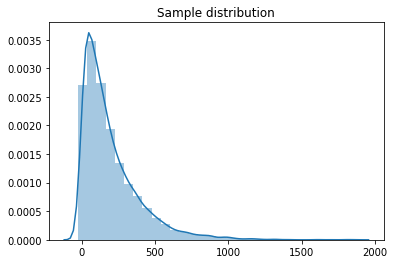

In [68]:
sns.distplot(samples, bins=30).set_title("Sample distribution")
plt.show()

In [70]:
greater_than_one = float(len([1 for s in samples if s > 1]))
print("The percentage of samples greater than 1 is %.1f percent." %(greater_than_one/num_samples*100))

The percentage of samples greater than 1 is 99.5 percent.


In [71]:
analytical = 1 - sp.norm.cdf(0, mean, sdv)
print("Solving analytically, the percentage of samples greater than 1 is %.1f percent." %(analytical*100))

Solving analytically, the percentage of samples greater than 1 is 99.4 percent.


### 4. Marginal and Conditional Probabilities
In a country with high unemployment, 25.2% of the working population is considered “young”, and
of the young working population, 37.7% are unemployed. The unemployment rate for those in the
working population who are not young, is lower at 21.5%.

Write down or calculate, as required, all the following marginal and conditional probabilities for the
working population in this scenario.

- **P(young)** = **0.252**
- **P(not young)** = 1 - P(young) = **0.748**
- **P(unemployed)** = P(unemployed & young) + P(unemployed & not young) = 0.095 + 0.161 = **0.256**
- **P(not unemployed)** = 1 - P(unemployed) = 1 - 0.256 = **0.744**
- **P(unemployed | young)** = **0.377**
- **P(young | unemployed)** = P(unemployed & young) P(unemployed) = 0.095 / 0.256 = **0.371**
- **P(unemployed | not young)** = **0.215**
- **P(not young | unemployed)** = P(unemployed & not young) / P(unemployed) = 0.161 / 0.256 = **0.629**

Others:
- P(unemployed & young) = P(young) * P(unemployed | young) = 0.252 * 0.377 = 0.095
- P(unemployed & not young) = P(not young) * P(unemployed | not young) = 0.748 * 0.215 = 0.161

### 5. Inference
You take a guess and think there is a 33% chance that Olivia, 5 year old girl, will be able to read at
Grade 1 level by the time she turns 6. (Kids usually start learning to read later, at school, so this
isn’t a terrible guess.)

An educational expert tells you that of children who are already able to read at Grade 1 level by the
time they turn 6 years old, 65% had training (usually by their parents) in pronouncing simple words
and writing some letters, and 35% did not. On the other hand, of children who are not already able
to read at Grade 1 level by age 6, only 10% had the same training.

- **P(read)** = **0.33**
- **P(not read)** = 1 - P(read) = 1 - 0.33 = **0.67**
- **P(train | read)** = **0.65**
- **P(not train | read)** = **0.35**
- **P(train | not read)** = **0.1**
- **P(not train | not read)** = 1 - P(train | not read) = 1 - 0.1 = **0.9**

- After receiving this information, what is your revised estimate of the probability that Olivia will be able to read at that level if you learned that her parents are currently busy doing basic training for reading with her?



- **P(train & read)** = P(read) * P(train | read) = 0.33 * 0.65 = **0.2145**
- **P(train & not read)** = P(not read) * P(train | not read) = 0.67 * 0.1 = **0.067**
- **P(train)** = P(train & read) + P(train & not read) = 0.2145 + 0.067 = **0.2815**

Having calculated the base rate for children receiving reading training at 28.15%, we can now update our estimate using Bayes' Theorem:

$P(read | train) = \frac{P(train|read) * P(read)}{P(train)}$

$P(read | train) = \frac{0.65 * 0.33}{0.2815} = 0.762$

- The above is a very simple statistical model. In a paragraph of 80–120 words outline the structure of the model. What are the variables? How are these variables related?

Bayes Theorem has four core components. On the right-hand side, we have the likelihood multiplied by the prior, divided by the marginal or base rate. This will give us an updated "guess" called the prior on the left-hand side. 

The likelihood is an estimate of how probable the observed evidence (training) is, given that the hypothesis (Olivia can read) is true. The prior represents how probable our hypothesis (Olivia can read) was before we observed the new evidence (she has training). The marginal evaluates how probable the new evidence (Olivia has training) is under all possible hypotheses. Taken together, these give us the posterior estimate showing how probable our hypothesis is (Olivia can read), given that the evidence is observed (Olivia had training).